## Boston House Price Prediction

#### Attribute Information
Input features in order:<br>
1)<b> CRIM:</b> per capita crime rate by town<br>
2)<b>ZN:</b>proportion of residential land zoned for lots over 25,000 sq.ft.<br>
3)<b>INDUS:</b> proportion of non-retail business acres per town<br>
4)<b>CHAS:</b> Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
5)<b>NOX:</b> nitric oxides concentration (parts per 10 million) [parts/10M]<br>
6)<b>RM: </b>average number of rooms per dwelling<br>
7)<b>AGE:</b> proportion of owner-occupied units built prior to 1940<br>
8)<b>DIS:</b> weighted distances to five Boston employment centres<br>
9)<b>RAD: </b>index of accessibility to radial highways<br>
10)<b>TAX: </b>full-value property-tax rate per $10,000 [$/10k]<br>
11)<b>PTRATIO:</b> pupil-teacher ratio by town


### Import Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Loading The Dataset

In [6]:
housing=pd.read_csv('BostonHousing.csv')
df=pd.DataFrame(housing)
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [7]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Preprocessing The Data

In [10]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [11]:
hp=df['rm'].mean()
df['rm'].fillna(hp, inplace=True)


In [12]:
df.drop_duplicates()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [13]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         442
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [14]:
df.rename(columns ={'medv':'price'})

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

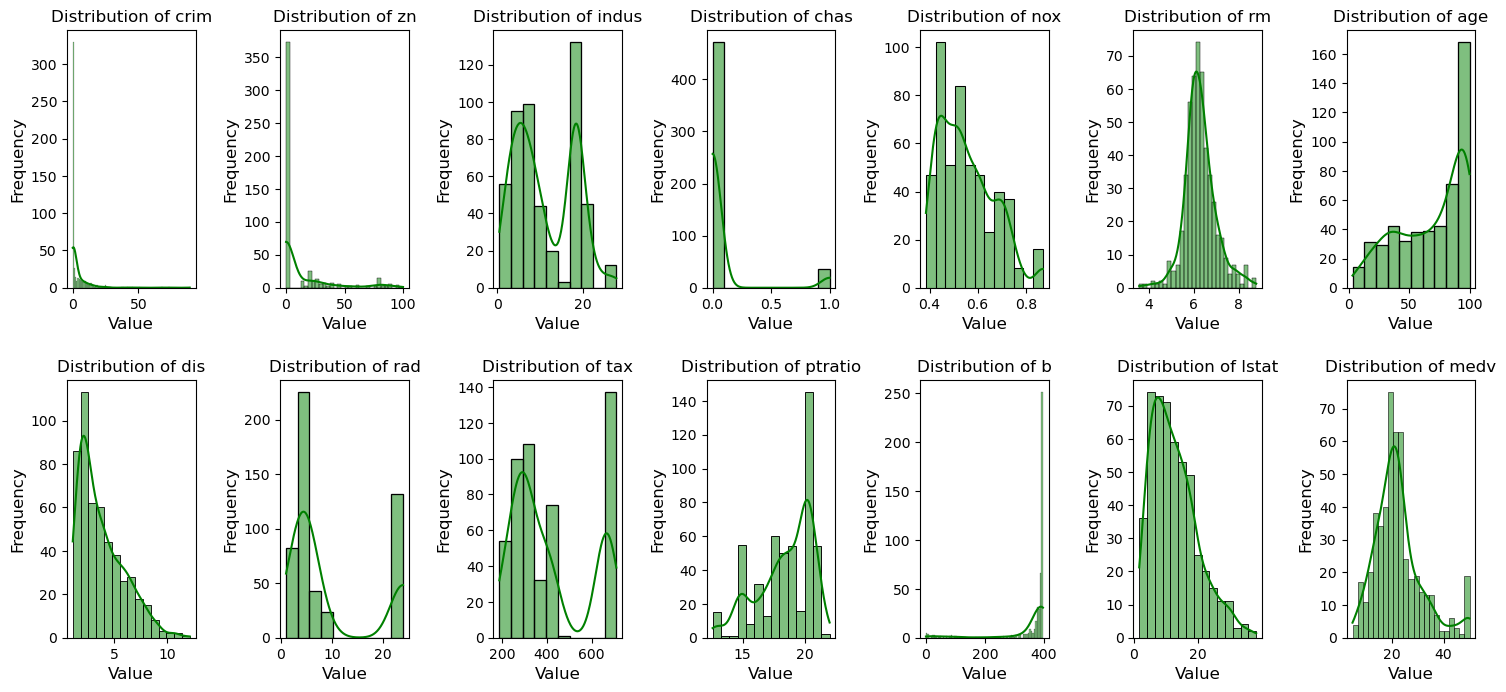

In [15]:
# Create subplots with optimized layout
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15, 7))
ax = ax.flatten()

# Plot each column's distribution
for index, (col, value) in enumerate(df.items()):
    sns.histplot(value, kde=True, ax=ax[index], color='green')  # Using histplot
    ax[index].set_title(f'Distribution of {col}', fontsize=12)
    ax[index].set_xlabel('Value', fontsize=12)
    ax[index].set_ylabel('Frequency', fontsize=12)

for i in range(index + 1, len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout(pad=1.0, w_pad=1.5, h_pad=2.0)
plt.show()

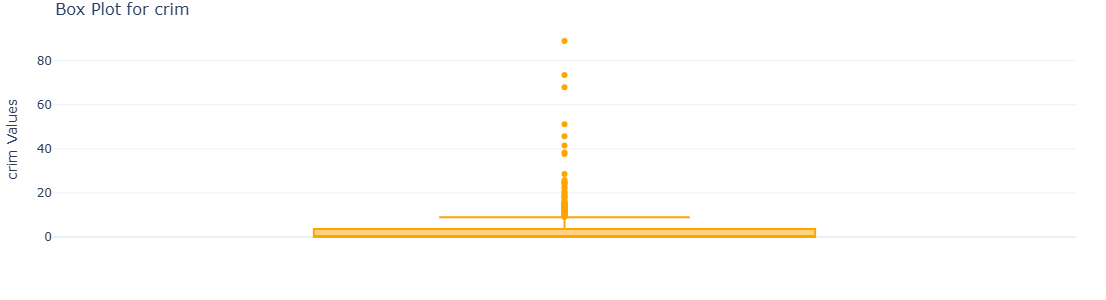

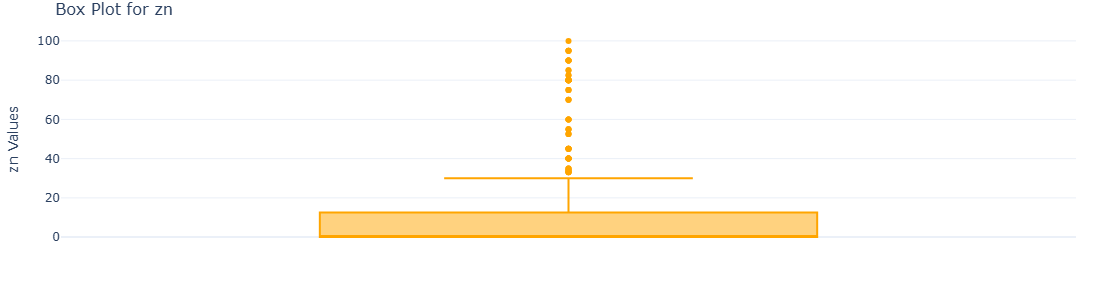

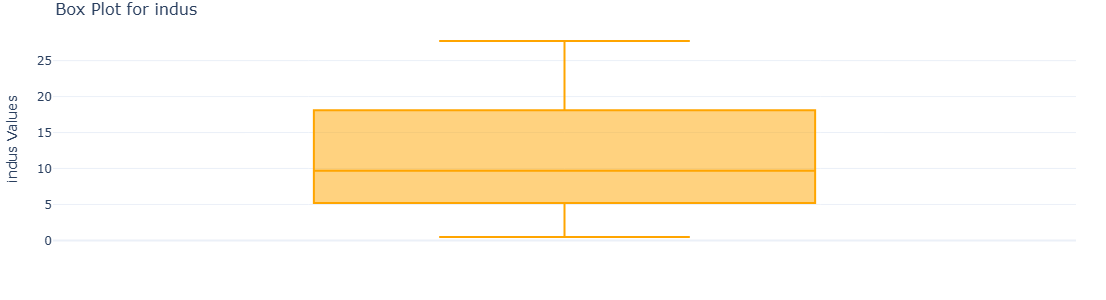

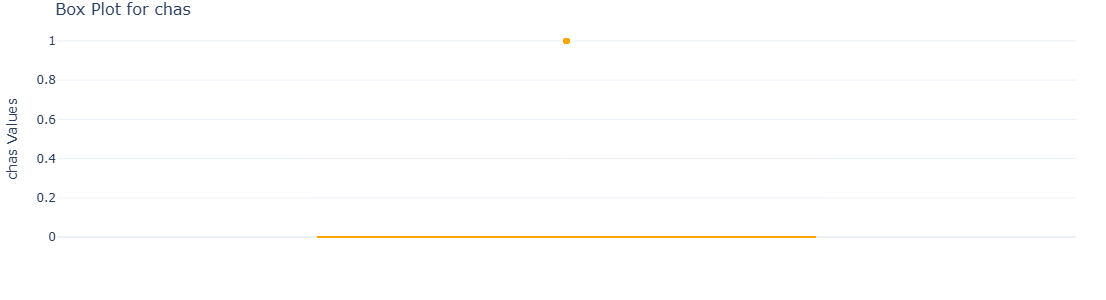

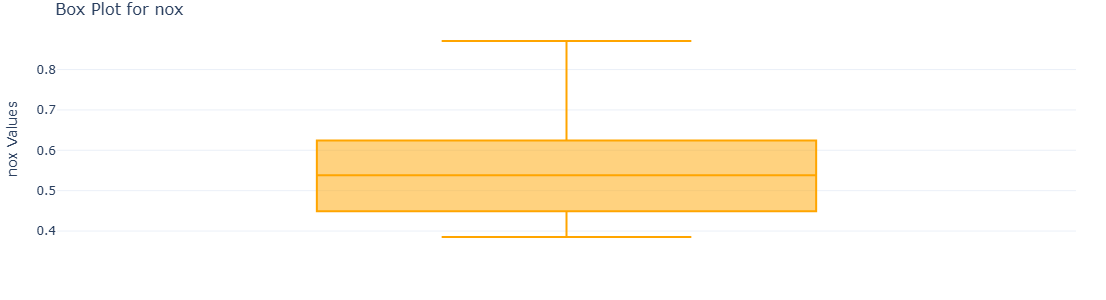

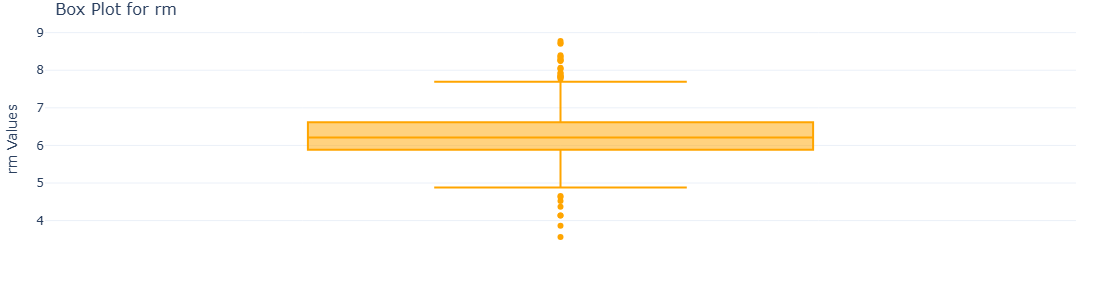

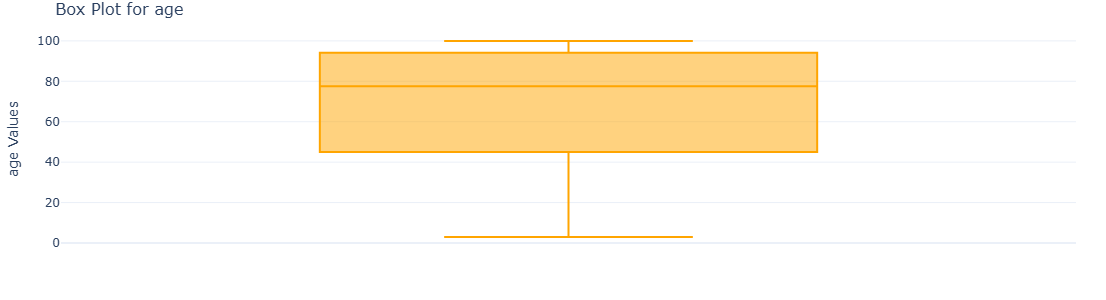

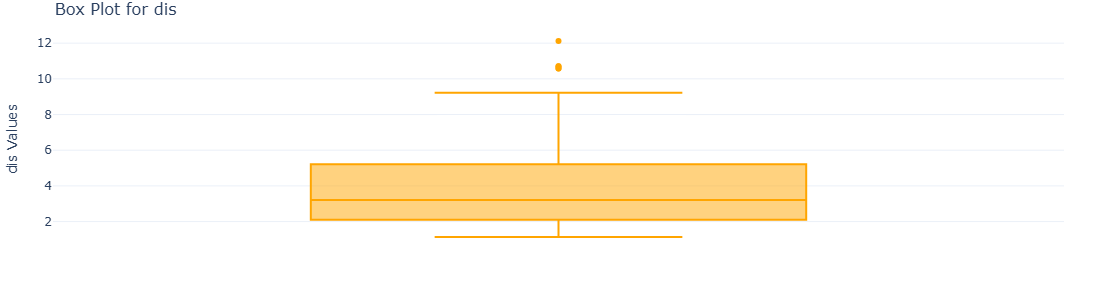

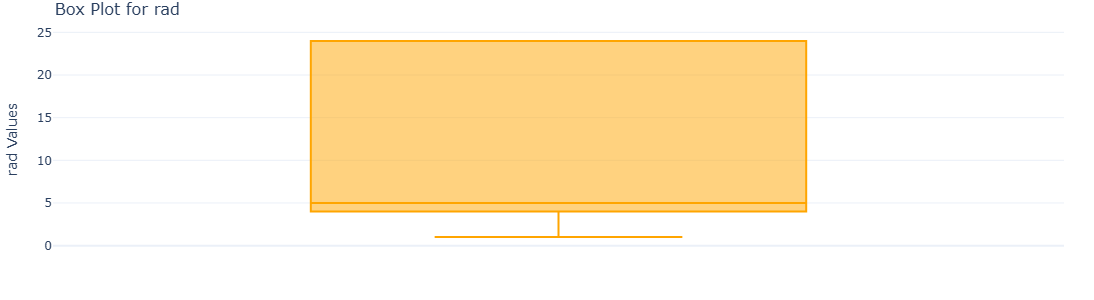

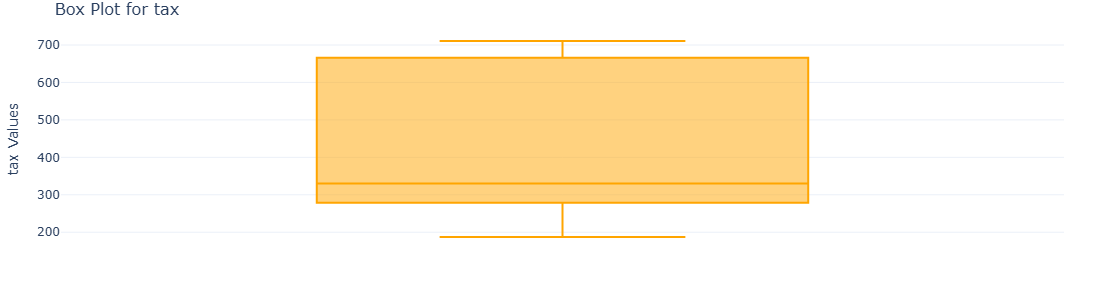

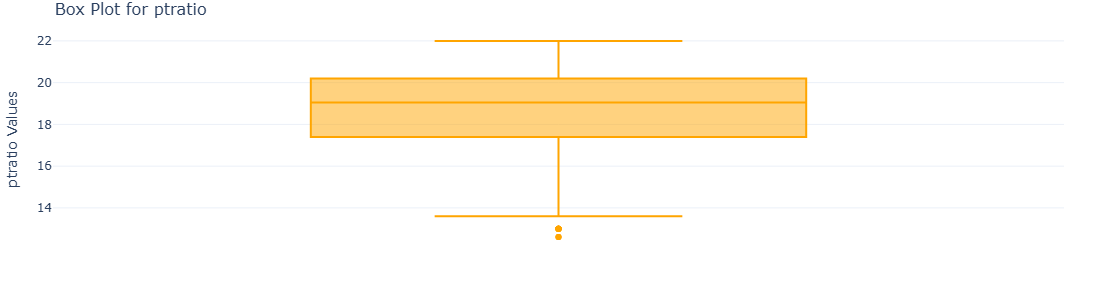

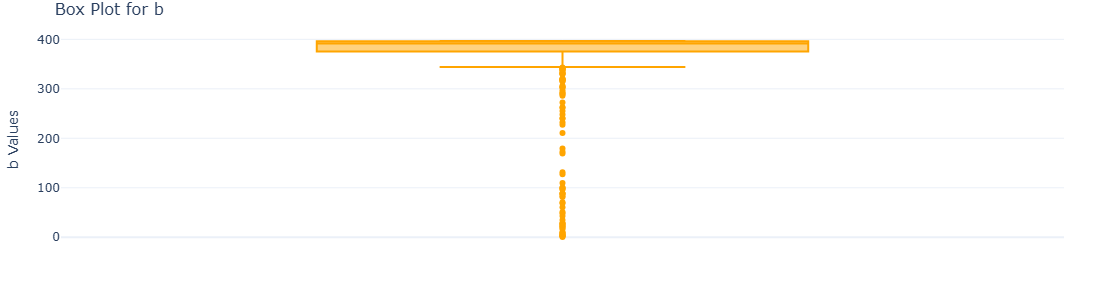

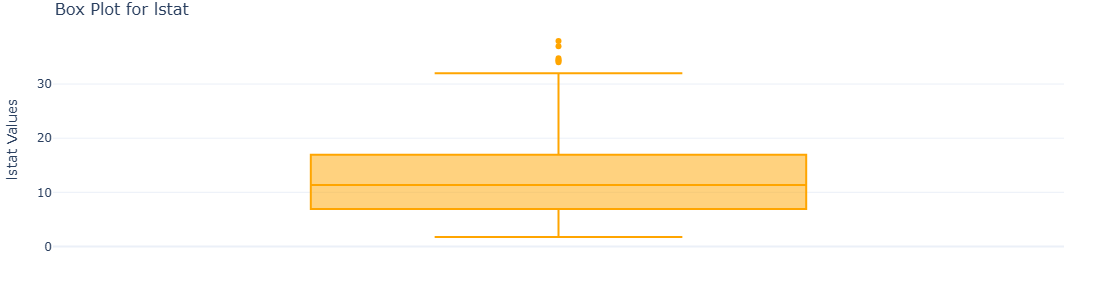

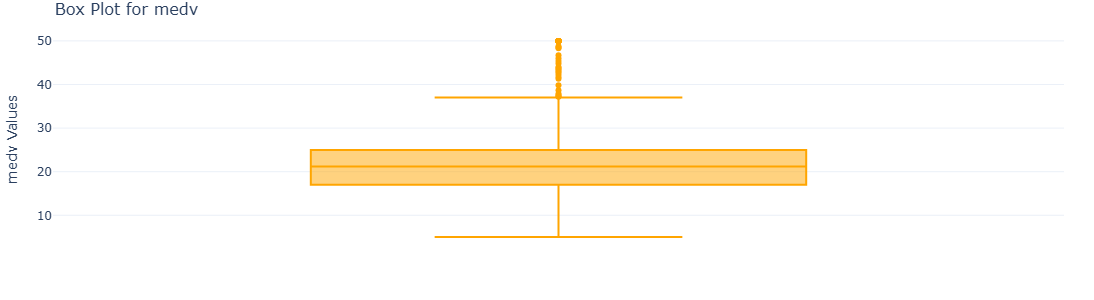

In [16]:
for column in df.columns:
    fig = px.box(df, y=column, color_discrete_sequence=['orange'], template='plotly_white',
                 title=f"Box Plot for {column}")
    fig.update_layout(
        title_font_size=16, yaxis_title=f"{column} Values", xaxis_title="", margin=dict(l=30, r=30, t=30, b=30),
    height=300, width=500)
    fig.show()

### Analyzing Correalted Features

In [18]:
df.corr()

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219261  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.310847 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.392052  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091434  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302051  0.731470   
rm      -0.219261  0.310847 -0.392052  0.091434 -0.302051  1.000000 -0.239632   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.239632  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.202268 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.210353  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292178  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.356065  0.261515   
b       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.127998 -0.273534   
lstat    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.614526  0.602339   
medv    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695375 -0.376955   

              dis       rad       tax   ptratio         b     lstat      medv  
crim    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
zn       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
indus   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
chas    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
nox     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
rm       0.202268 -0.210353 -0.292178 -0.356065  0.127998 -0.614526  0.695375  
age     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
dis      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
rad     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
tax     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
ptratio -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
b        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
lstat   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
medv     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

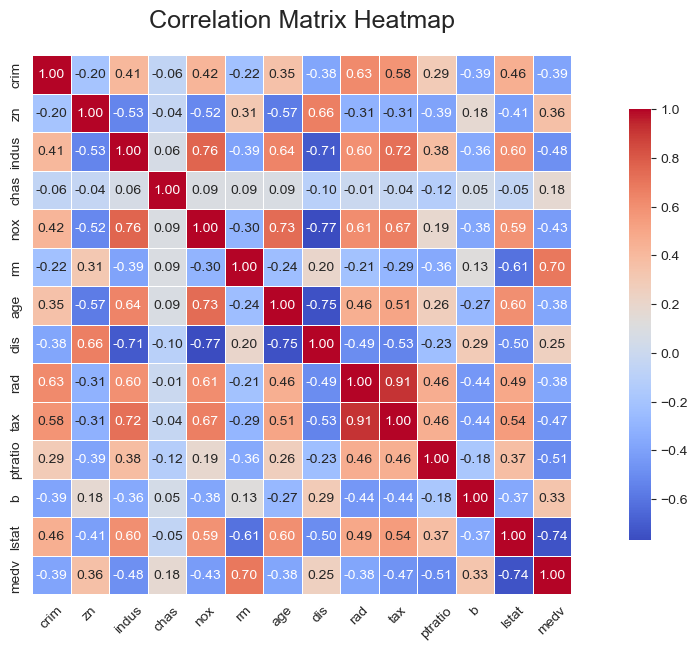

In [19]:
#Calculate correlation matrix
corr=df.corr()
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

heatmap=sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='white',
                    cbar_kws = {"shrink":0.8}, square= True)

plt.title("Correlation Matrix Heatmap", fontsize=18, pad=20)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Showing Some  Patterns Between Features

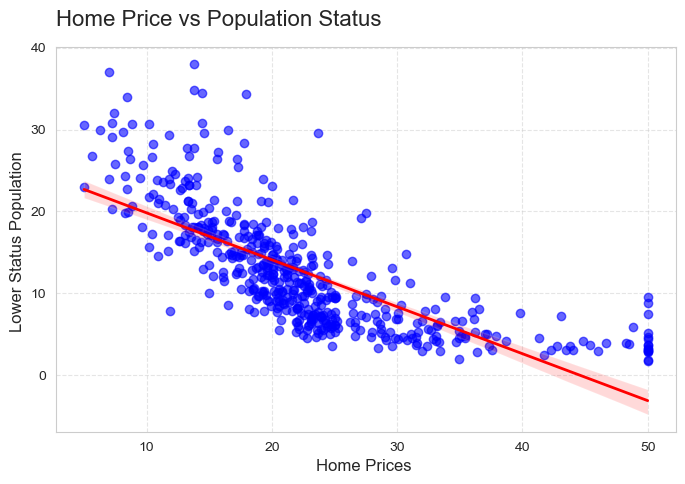

In [21]:
plt.figure(figsize=(8,5)) 
sns.set_style("whitegrid") 

sns.regplot( y=df['lstat'],   x=df['medv'], 
    scatter_kws={"color": "blue", "alpha": 0.6},  
    line_kws={"color": "red", "linewidth": 2}, marker="o")

plt.xlabel('Home Prices ', fontsize=12)
plt.ylabel('Lower Status Population ', fontsize=12)
plt.title('Home Price vs Population Status', fontsize=16, pad=15, loc='left')
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()

Text(0.0, 1.0, 'Home Price vs Avg Number of Rooms per Dwelling')

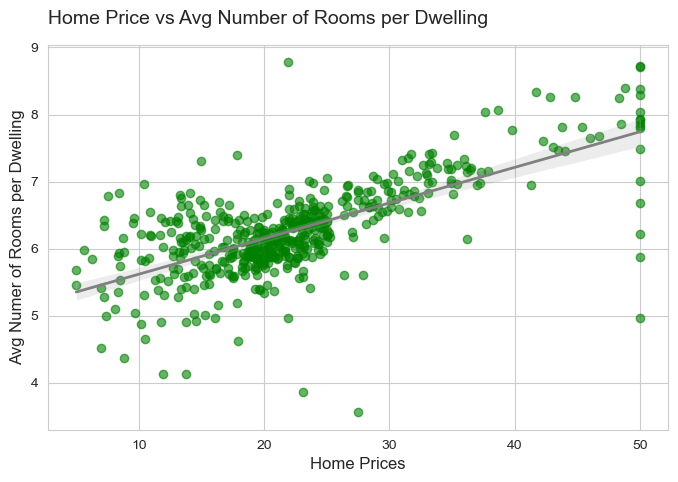

In [22]:
plt.figure(figsize=(8, 5)) 
sns.set_style("whitegrid") 
sns.regplot(y=df['rm'], x=df['medv'], scatter_kws={'color':'green', 'alpha':0.6},
             line_kws={'color':'grey', 'linewidth':2})
plt.xlabel('Home Prices', fontsize=12)
plt.ylabel('Avg Numer of Rooms per Dwelling', fontsize=12)
plt.title('Home Price vs Avg Number of Rooms per Dwelling', fontsize=14, pad=15, loc='left')

Text(0.0, 1.0, 'Home Price vs Age Of House')

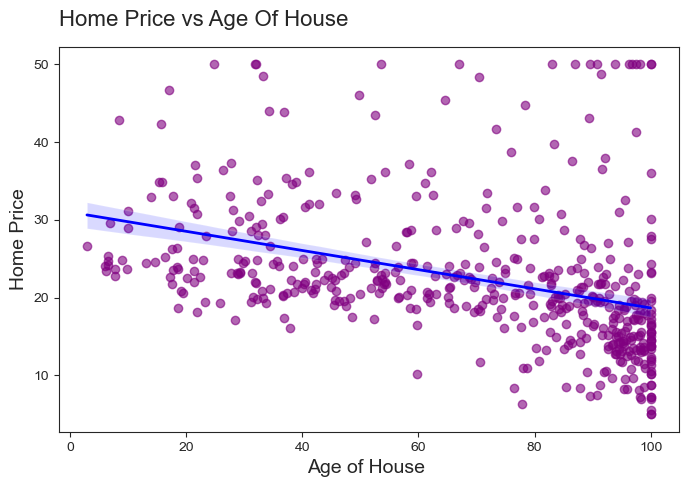

In [23]:
plt.figure(figsize=(8,5))
sns.set_style('ticks')
sns.regplot(x='age', y='medv',data=df,  scatter_kws= {'color':'Purple', 'alpha':0.6},
           line_kws={'color':'blue', 'linewidth': 2})
plt.xlabel('Age of House ', fontsize=14)
plt.ylabel('Home Price', fontsize=14)
plt.title('Home Price vs Age Of House', fontsize=16, loc='left', pad=15)

Text(0.0, 1.0, 'Home Price vs Tax')

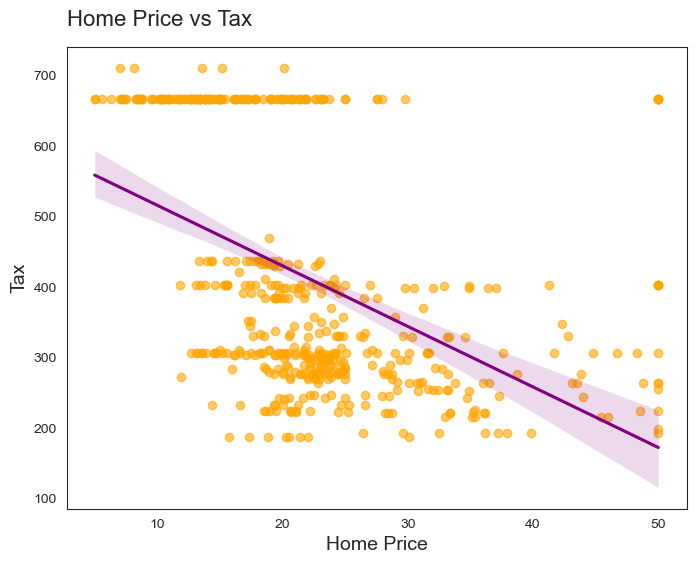

In [24]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.regplot(x=df['medv'], y=df['tax'], scatter_kws={'color':'orange', 'alpha': 0.6},
           line_kws={'color':'purple'})
plt.xlabel('Home Price' ,fontsize=14)
plt.ylabel('Tax', fontsize=14)
plt.title('Home Price vs Tax', fontsize=16, loc='left', pad=15)

### Feature Selection

In [26]:
x=df[['crim','zn','rm','age','tax']]
y=df['medv']

In [27]:
x

crim    zn     rm   age  tax
0    0.00632  18.0  6.575  65.2  296
1    0.02731   0.0  6.421  78.9  242
2    0.02729   0.0  7.185  61.1  242
3    0.03237   0.0  6.998  45.8  222
4    0.06905   0.0  7.147  54.2  222
..       ...   ...    ...   ...  ...
501  0.06263   0.0  6.593  69.1  273
502  0.04527   0.0  6.120  76.7  273
503  0.06076   0.0  6.976  91.0  273
504  0.10959   0.0  6.794  89.3  273
505  0.04741   0.0  6.030  80.8  273

[506 rows x 5 columns]

### Model Training

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
x_train=scaler.fit_transform(x_train)

In [32]:
x_test=scaler.transform(x_test)

In [33]:
x_train

array([[-0.41425879, -0.50512499,  0.14403812, -0.365584  , -1.11279004],
       [-0.40200818, -0.50512499, -0.20979793,  0.13394078,  0.15008778],
       [-0.39721053, -0.50512499, -0.89796727, -1.26690045, -1.0466393 ],
       ...,
       [-0.41604586,  3.03838247,  0.42961447, -1.41530998, -0.76399522],
       [ 0.92611293, -0.50512499,  0.42125613,  0.93390438,  1.5572945 ],
       [-0.39030549, -0.50512499,  0.10921174,  0.60088786, -0.13857001]])

#### Linear Regression Model

<Axes: title={'center': 'Model Coefficients'}>

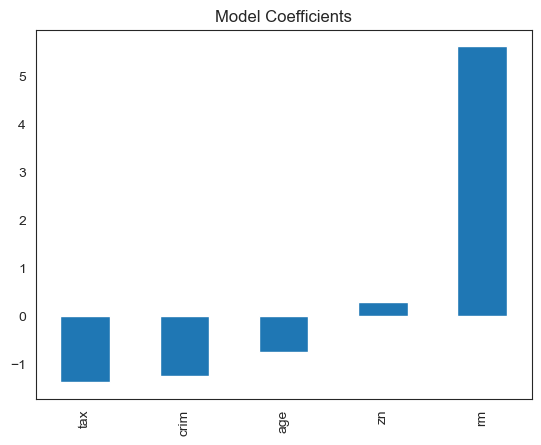

In [35]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train, y_train)

coef=pd.Series(regression.coef_, x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [36]:
regression.coef_

array([-1.25885833,  0.29196722,  5.61063882, -0.74954927, -1.39250348])

In [37]:
regression.intercept_

23.01581920903955

In [38]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [39]:
#Prediction with Test Data
pred=regression.predict(x_test)

In [40]:
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(y_test, pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('R-Squared:', r2_score(y_test,pred))


Mean Squared Error: 30.688931347875183
Root Mean Squared Error: 5.539759141684337
Mean Absolute Error: 3.7313332509549677
R-Squared: 0.5881404320409223


##### Visulizing the differences between actual prices and predicted  values


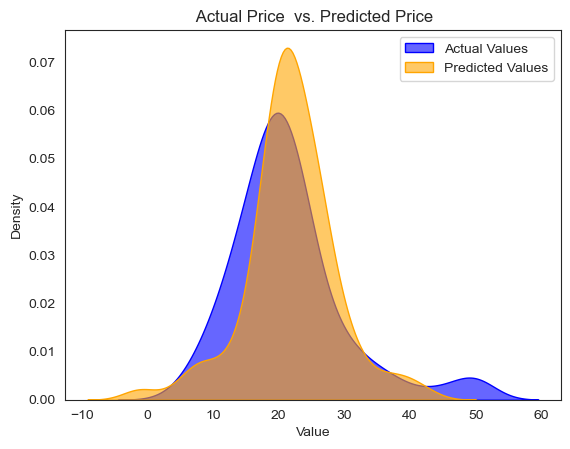

In [42]:
sns.kdeplot(y_test, label="Actual Values", fill=True, color='blue', alpha=0.6)
sns.kdeplot(pred, label="Predicted Values", fill=True, color='orange', alpha=0.6)
plt.title(" Actual Price  vs. Predicted Price")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Decision Tree Regressor model


In [44]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor(max_depth=3)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [45]:
# Make Predictions
y_pred=reg.predict(x_test)

In [46]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R-Squared:', r2_score(y_test,y_pred))

Mean Squared Error: 23.86290274249838
Root Mean Squared Error: 4.884967015497482
Mean Absolute Error: 3.21844190244021
R-Squared: 0.679748874199383


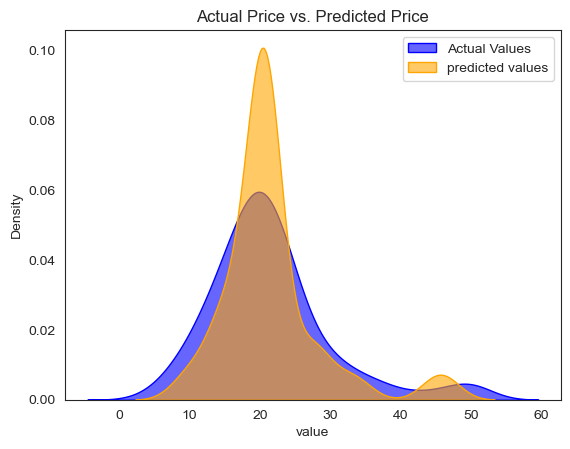

In [47]:
sns.kdeplot(y_test, label="Actual Values", fill=True, color='blue', alpha=0.6)
sns.kdeplot(y_pred, label='predicted values', fill=True, color='orange', alpha=0.6)
plt.title('Actual Price vs. Predicted Price')
plt.xlabel("value")
plt.ylabel('Density')
plt.legend()
plt.show()

#### Random Forest Regressor Model

In [49]:
from sklearn.ensemble import RandomForestRegressor
random= RandomForestRegressor(n_estimators=100, random_state=42)
random.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
ypred=random.predict(x_test)

In [51]:
print('Mean Squared Error:', mean_squared_error(y_test, ypred))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(y_test, ypred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))
print('R2 Score:', r2_score(y_test, ypred))

Mean Squared Error: 22.36654867763159
Root Mean Squared Error: 4.729328565201575
Mean Absolute Error: 2.9296907894736854
R2 Score: 0.6998306337003541


In [ ]:
sns.kdeplot(y_test, label="Actual Values", fill=True, color='Blue', alpha=0.6)
sns.kdeplot(ypred, label='predicted values', fill=True, color='Orange', alpha=0.6)
plt.title('Actual Price vs. Predicted Price')
plt.xlabel("value")
plt.ylabel('Density')
plt.legend()
plt.show()